# Distribution des effectif d'associations par événements

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from fanalysis.ca import CA 
from fanalysis.mca import MCA
import plotly.express as px
# Importation du fichier csv qui se trouve dans le même dossier que le notebook
data = pd.read_csv('../CSV/analyse_temps_evenements.CSV')

# Vérifier les premières lignes et les types de données
print(data.head())  # Affiche les 5 premières lignes pour vérifier les données
print(data.dtypes)  # Affiche les types de données de chaque colonne

   pk_evenement                                                nom  \
0             1             manifestation des ouvrier-ère-s de Lip   
1             2     meeting en solidarité aux ouvrier-ère-s de Lip   
2             3             manifestation des ouvrier-ère-s de Lip   
3             4             manifestation des ouvrier-ère-s de Lip   
4             5  regroupement devant le consulat suisse des ouv...   

   date_debut    date_fin    pays  
0  1973-05-18  1973-05-18  Suisse  
1  1973-05-25  1973-05-25  Suisse  
2  1973-05-18  1973-05-18  France  
3  1973-05-18  1973-05-18  France  
4  1973-05-18  1973-05-18  France  
pk_evenement     int64
nom             object
date_debut      object
date_fin        object
pays            object
dtype: object


In [9]:


# Regrouper les événements par date et pays, et compter le nombre d'événements
events_per_day = data.groupby(['date_debut', 'pays']).size().reset_index(name='count')

# Créer un diagramme à barres avec une seule couleur par pays
fig = px.bar(events_per_day, 
             x='date_debut', 
             y='count', 
             color='pays',  # Utiliser le pays pour colorier les événements
             title="Distribution des évènements par jour et pays du cycle de manifestations mai à octobre 1973",  # Titre du graphique
             labels={"date_debut": "Date", "count": "Nombre d'événements", "pays": "Pays"},  # Étiquettes
             height=400,  # Hauteur du graphique
             color_discrete_map={'Suisse': 'red', 'France': 'blue'})  # Définir les couleurs

# Personnalisation du graphique
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Nombre d'événements",
    barmode='stack',  # Empiler les événements qui ont lieu le même jour
    xaxis=dict(tickformat='%Y-%m-%d', tickangle=45),  # Format des dates
    legend_title="Pays"
)

# Afficher le graphique
fig.write_image("distribution_evenements_jour_pays.png", width=1600, height=800)
fig.write_html("distribution_evenements_jour_pays.html", auto_open=True)

In [12]:
# Importation du fichier csv qui se trouve dans le même dossier que le notebook
df = pd.read_csv("analyse_reseaux_1.csv")

In [13]:
# Vérifier les premières lignes pour s'assurer que les données sont bien structurées
print(df.head())

                    nom  pk_evenement  \
0              CFDT-Lip            34   
1               CGT-Lip            34   
2         Personnel Lip            34   
3              CFDT-Lip             1   
4  Comité d'action (CA)             1   

                                       nom_evenement        date  \
0  regroupement devant le consulat suisse des ouv...  1973-05-10   
1  regroupement devant le consulat suisse des ouv...  1973-05-10   
2  regroupement devant le consulat suisse des ouv...  1973-05-10   
3             manifestation des ouvrier.ère.s de Lip  1973-05-18   
4             manifestation des ouvrier.ère.s de Lip  1973-05-18   

          nom_lieu      ville    pays  
0  Consulat suisse   Besançon  France  
1  Consulat suisse   Besançon  France  
2  Consulat suisse   Besançon  France  
3    Place du Port  Neuchâtel  Suisse  
4    Place du Port  Neuchâtel  Suisse  


In [15]:
print(df['pays'].unique())

['France' 'Suisse']


In [16]:
# Nettoyer la colonne 'pays' en supprimant les espaces superflus et en convertissant en minuscule
df['pays'] = df['pays'].str.strip().str.title()

# Vérifier à nouveau les pays uniques après nettoyage
print(df['pays'].unique())


['France' 'Suisse']


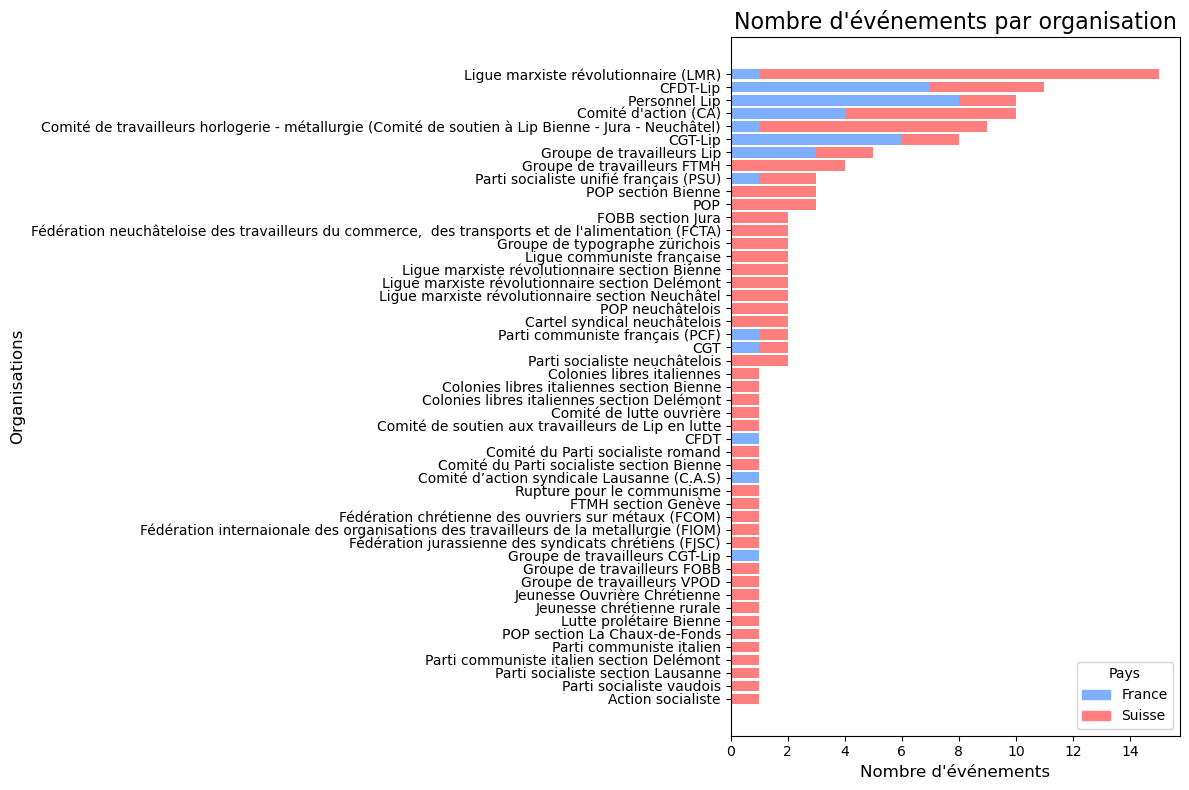

In [39]:
# Compter le nombre d'événements par organisation et pays
event_counts = df.groupby(['nom', 'pays'])['pk_evenement'].nunique().reset_index(name='event_count')

# Trier les organisations par le nombre d'événements auxquelles elles ont participé (du plus grand au plus petit)
# org_event_count = event_counts.groupby('nom')['event_count'].sum().sort_values(ascending=True)

# Obtenir les pays uniques
pays = df['pays'].unique()

# Créer un dictionnaire pour colorier chaque pays
colors = sns.color_palette("Set2", len(pays))  # Choisir "Set2" ou une autre palette
country_colors = {
    'France': '#7fafff',  # bleu
    'Suisse': '#ff7f7f',  # rouge
}

# Créer une figure et un axe pour le graphique
fig, ax = plt.subplots(figsize=(12, 8))

# Définir la position de chaque organisation sur l'axe Y
org_positions = {org: idx for idx, org in enumerate(org_event_count.index)}

# Créer un compteur pour les événements sur l'axe X (ils seront séparés)
event_positions = {}

# Tracer les barres pour chaque organisation
for i, org in enumerate(org_event_count.index):
    org_data = event_counts[event_counts['nom'] == org]
    
    # Initialiser le compteur d'événements pour cette organisation
    event_positions[org] = 0

    # Tracer les barres pour chaque pays pour une organisation donnée
    for _, row in org_data.iterrows():
        # Définir la position de l'événement sur l'axe X
        x_pos = event_positions[org]
        
        # Tracer la barre pour l'événement
        ax.barh(org_positions[org], row['event_count'], left=x_pos, color=country_colors[row['pays']])
        
        # Mettre à jour la position de l'événement sur l'axe X
        event_positions[org] += row['event_count']  # Déplacement pour le prochain événement

# Ajouter les labels pour les organisations (axe Y)
ax.set_yticks(range(len(org_event_count.index)))
ax.set_yticklabels(org_event_count.index)

# Ajouter un titre et des étiquettes d'axes
ax.set_title("Nombre d'événements par organisation", fontsize=16)
ax.set_xlabel("Nombre d'événements", fontsize=12)
ax.set_ylabel("Organisations", fontsize=12)

# Ajouter une légende avec une seule entrée par pays
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in country_colors.values()]
labels = list(country_colors.keys())
ax.legend(handles, labels, title="Pays")

# Optimiser la disposition pour les labels des organisations
plt.tight_layout()
f = 'diagramme_barre_1.png'
plt.savefig(f, format="png")
# Afficher le graphique
plt.show()

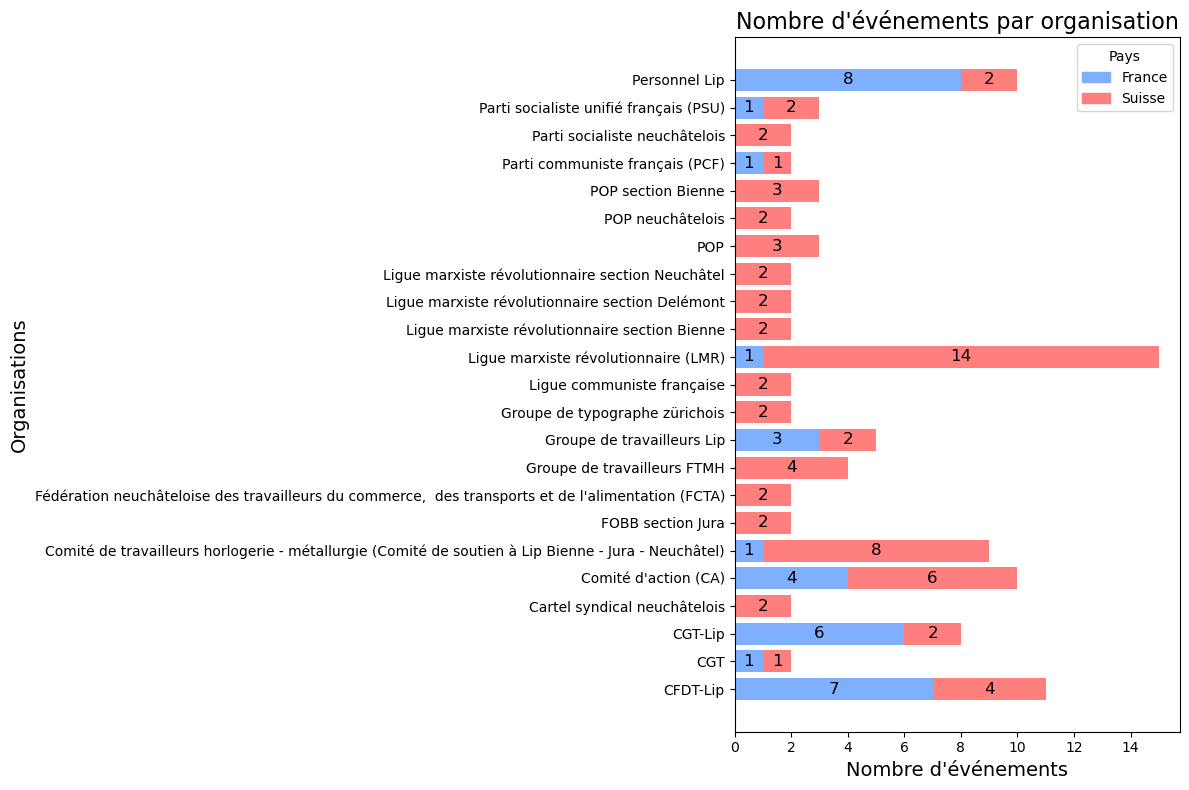

In [43]:
# Nettoyer la colonne 'pays' (enlever les espaces superflus et normaliser la casse)
df['pays'] = df['pays'].str.strip().str.title()

# Compter le nombre d'événements par organisation et pays
#event_counts = df.groupby(['nom', 'pays'])['pk_evenement'].nunique().reset_index(name='event_count')

# Compter le nombre total d'événements par organisation
#org_event_count = event_counts.groupby('nom')['event_count'].sum()

# Filtrer les organisations qui sont allées à au moins 2 événements
org_event_count = org_event_count[org_event_count >= 2]

# Filtrer les données des événements pour ne garder que les organisations sélectionnées
filtered_event_counts = event_counts[event_counts['nom'].isin(org_event_count.index)]

# Trier les organisations par le nombre d'événements auquel elles ont participé (du plus grand au plus petit)
#org_event_count = org_event_count.sort_values(ascending=True)

# Obtenir les pays uniques
pays = df['pays'].unique()

# Créer une palette de couleurs différente (par exemple, Set2)
colors = sns.color_palette("Set2", len(pays))  # Choisir "Set2" ou une autre palette

country_colors = {
    'France': '#7fafff',  # bleu
    'Suisse': '#ff7f7f',  # rouge
}


# Créer une figure et un axe pour le graphique
fig, ax = plt.subplots(figsize=(12, 8))

# Définir la position de chaque organisation sur l'axe Y
org_positions = {org: idx for idx, org in enumerate(org_event_count.index)}

# Créer un compteur pour les événements sur l'axe X (ils seront séparés)
event_positions = {}

# Tracer les barres pour chaque organisation
for i, org in enumerate(org_event_count.index):
    org_data = filtered_event_counts[filtered_event_counts['nom'] == org]
    
    # Initialiser le compteur d'événements pour cette organisation
    event_positions[org] = 0

    # Tracer les barres pour chaque pays pour une organisation donnée
    for _, row in org_data.iterrows():
        # Définir la position de l'événement sur l'axe X
        x_pos = event_positions[org]
        
        # Tracer la barre pour l'événement
        ax.barh(org_positions[org], row['event_count'], left=x_pos, color=country_colors[row['pays']])
        
        # Ajouter le texte avec le nombre d'événements au milieu de la barre
        ax.text(x_pos + (row['event_count'] / 2), org_positions[org], 
                str(row['event_count']), ha='center', va='center', color='black', fontsize=12)
        
        # Mettre à jour la position de l'événement sur l'axe X
        event_positions[org] += row['event_count']  # Déplacement pour le prochain événement

# Ajouter les labels pour les organisations (axe Y)
ax.set_yticks(range(len(org_event_count.index)))
ax.set_yticklabels(org_event_count.index)

# Ajouter un titre et des étiquettes d'axes
ax.set_title("Nombre d'événements par organisation", fontsize=16)
ax.set_xlabel("Nombre d'événements", fontsize=14)
ax.set_ylabel("Organisations", fontsize=14)

# Ajouter une légende avec une seule entrée par pays
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in country_colors.values()]
labels = list(country_colors.keys())
ax.legend(handles, labels, title="Pays")

# Optimiser la disposition pour les labels des organisations
plt.tight_layout()
# Sauvegarder la figure
#f = 'diagramme_barre_2.png'
#plt.savefig(f, format="png")
# Afficher le graphique
plt.show()
